# Replication Project (Part 1)
## Shraven Arimilli
## Gable Brown

## 1. Description of the paper’s main question and data. (Keep your answer brief no more than 1 page) In your description, make sure to answer the following questions:
1. What question does the author attempt to answer? 
2. How is eligibility for veterans’ benefits determined?
3. Who is included in their study and where do the data come from?

Joshua Angrist attempts to determine the effects of veteran benefits, such as the GI Bill, VEAP, and other VA benefits. Using the 1987 Survey of Veterans (SOV-III) as a base, Angrist builds a statistical model to determine how educational benefits influence the maximum schooling of a veteran. The author also also looks at annual income increases among veterans who take advantage of such benefits. According to Angrist, veterans who served more than 180 consecutive days between 1955 and 1976 were eligible for the GI Bill. Of the 3,337 SOV-III veterans with any Vietnam-era or later service, 2,388 met the sample criteria for Angrist's study. 

## 2. Replicate all of Table 1 from Angrist (1993). Things to keep in mind:
- The best grades will go to the closest replications. The most important element is the accuracy of all numbers, but style is also important.
- You should be able to match the sample size and most numbers exactly, but you will notice that once you do that correctly, there will be a couple of numbers that are a little off. This is OK, but you should note which ones are different.
- Make sure that you carefully read all notes in the table as well as the part of the text that describes the data. This is where you’ll find an explanation of the sample selection as well as a description of which numbers appear in the table.
- You must use Stata (or a different statistical software) to calculate all of the numbers in the table, but you may use any software you’d like to actually put the numbers together into a table.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
def getDistCol(df, col):
    # How many records/rows
    total_count = len(df[col])
    # What are the category names
    cat_names = list(df[col].cat.categories)
    # For each category name, how many times does it appear
    # (Python treats True values like 1s and False values like 0s)
    cat_counts = [sum(df[col] == cat_name) for cat_name in cat_names]
    # What is that overall percentage
    cat_dist = [f"({100*cat_count/total_count:2.0f})" for cat_count in cat_counts]

    # Put it in a dataframe so that it can be easily printed
    # (This is a stupid way to do this, but if it's stupid and it works...)
    final = pd.DataFrame(
        [cat_names, cat_counts, cat_dist], index=[f"{col:<18}", "", ""]
    )
    return final.to_string(header=False, justify="center")


def printJust(str1, str2=""):
    print(str1, str2.rjust(100 - len(str1)))

In [3]:
df = pd.io.stata.read_stata("Angrist1993Replication.dta")

# Remove individual ages
df["age_cat"] = df["age_cat"].cat.remove_categories([27, 57, 22, 62, 67])
# Drop any Null values
df.dropna(subset=["age_cat", "years_serv_cat"], inplace=True)
# Drop females (Women want to learn too)
df = df[(df["female"] != 1)]
# Drop out of era vets
df = df[(df["viet_era"] == 1) | (df["early_avf_era"] == 1)]
# Drop negative schooling increment
df = df[(df["curgrade"] - df["entgrade"] >= 0)]
# Drop less than 9 grade level
df = df[(df["entgrade"] >= 9)]

In [4]:
# Print the first half of the table pretty like:
print("Frequency Distribution".center(80))
print("Variable            Category")
print("-" * 80)
for cat in ["age_cat", "years_serv_cat", "branch"]:
    print(getDistCol(df, cat))
    print("-" * 80)

                             Frequency Distribution                             
Variable            Category
--------------------------------------------------------------------------------
age_cat             30-34  35-39  40-44  45-49  50-55
                      368    787    937    275     21
                     (15)   (33)   (39)   (12)   ( 1)
--------------------------------------------------------------------------------
years_serv_cat       1-2   3-5  6-10  11-15
                     919  1183   258     28
                    (38)  (50)  (11)   ( 1)
--------------------------------------------------------------------------------
branch              Army  Navy  Air Force  Marines  Coast Guard
                    1170   519        413      229           28
                    (49)  (22)       (17)     (10)         ( 1)
--------------------------------------------------------------------------------


In [5]:
print("Means".center(100))

meansTable = [
    ("Variable", "Mean"),
    ("Demographics", ""),
    ("Grade Completed at Entry", f"{df['entgrade'].mean():0.2f}"),
    ("", f"({df['entgrade'].std():0.2f})"),
    ("Highest Grade Completed", f"{df['curgrade'].mean():0.2f}"),
    (" ", f"({df['curgrade'].std():0.2f})"),
    ("Schooling Increased", f"{df['edinc'].mean():0.2f}"),
    ("Non-White", f"{df['nonwhite'].mean():0.2f}"),
    ("Married at Entry", f"{df['entmar'].mean():0.2f}"),
    ("Married", f"{df['curmar'].mean():0.2f}"),
    ("", ""),
    ("Military and VA", " "),
    ("Vietnam Era Service", f"{df['viet_era'].mean():0.2f}"),
    ("Early AVF Service", f"{df['early_avf_era'].mean():0.2f}"),
    ("Drafted", f"{df['drafted'].mean():0.2f}"),
    ("Officer (Commissioned or Warrant)", f"{df['officer'].mean():0.2f}"),
    ("", ""),
    ("Other Program Usage and Training Since Discharge", ""),
    ("Used Any Since Discharge", f"{df['any_ed'].mean():0.2f}"),
    ("Attended College/Graduate School", f"{df['coll_grad'].mean():0.2f}"),
    ("Attended/Completed High School", f"{df['hs'].mean():0.2f}"),
    ("Received Vocational/Technical Training", f"{df['voc_tech'].mean():0.2f}"),
    ("Received OJT/Apprentice", f"{df['ojt_appren'].mean():0.2f}"),
    ("Participated in Correspondence Course", f"{df['corresp'].mean():0.2f}"),
    ("Other Training (e.g., Flight School)", f"{df['oth_train'].mean():0.2f}"),
    ("", ""),
    ("Veteran Benefits", ""),
    ("Receive Any Financial Aid", f"{df['anyaid'].mean():0.2f}"),
    ("Receive Any Federal Aid", f"{df['anyfed'].mean():0.4f}"),
    ("Use the G.I. Bill", f"{df['gibill'].mean():0.2f}"),
    ("Use the VEAP", f"{df['veap'].mean():0.4f}"),
    ("Use Other VA Assistance", f"{df['otherva'].mean():0.4f}"),
    ("Use Any VA Assistance", f"{df['anyva'].mean():0.2f}"),
    ("", ""),
    ("Labor Market", ""),
    ("Full-Time Worker", f"{df['fulltime'].mean():0.2f}"),
    ("Health Affects Work", f"{df['health'].mean():0.2f}"),
    ("1986 Earnings", f"{df['earn86'].mean():0.2f}"),
    ("", f"({df['earn86'].std():0.2f})"),
]

done = [printJust(i, j) for i, j in meansTable]

                                               Means                                                
Variable                                                                                         Mean
Demographics                                                                                         
Grade Completed at Entry                                                                        12.55
                                                                                               (1.75)
Highest Grade Completed                                                                         14.00
                                                                                               (2.12)
Schooling Increased                                                                              0.61
Non-White                                                                                        0.12
Married at Entry                                                                   

## 3. Replicate Figures 1 and 2 given on page 3 of this assignment. Things to keep in mind:
- All figures were created using the sample from Table 1. You probably want to make sure your numbers from Table 1 are correct before making the figures.
- Again, the best grades will go to the closest replications. The most important element is that the figure displays the correct data, but style also matters (i.e. having a white border instead of Stata’s default, the same legend labels, etc.). You’ll find Stata’s help files and internet searches especially helpful here!
- You must use Stata (or a different statistical software) to create the figures, but may paste them into word or another text editor when compiling the final output file.

In [6]:
# Boxplot
ax = sns.boxplot(x="curgrade", y="earn86", data=df)

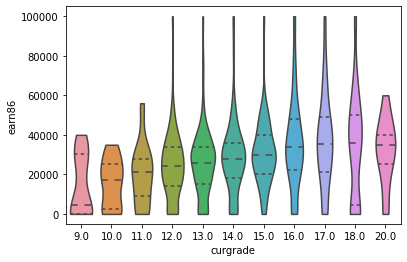

In [7]:
# Bonus violin plot! Fun and curvy
ax = sns.violinplot(x="curgrade", y="earn86", data=df, cut=0, inner="quartile")

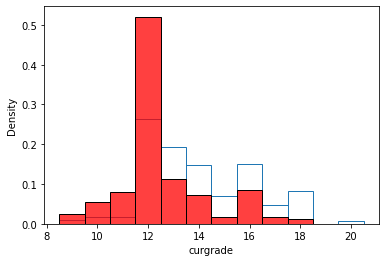

In [8]:
# Overlay barcharts
ay = sns.histplot(
    x="curgrade", stat="density", data=df, linewidth=1, fill=False, discrete=True
)
ay = sns.histplot(
    x="entgrade", stat="density", data=df, linewidth=1, discrete=True, color="red"
)